https://towardsdatascience.com/using-the-fitbit-web-api-with-python-f29f119621ea

In [1]:
client_id = 239666
client_secret = '76d7502bb5ae9719ff806a6d664bcb61'
redirect_uri = " http://127.0.0.1:8080/"

# This is a python file you need to have in the same directory as your code so you can import it
import gather_keys_oauth2 as Oauth2
import fitbit
import pandas as pd 
import datetime



CLIENT_ID=client_id
CLIENT_SECRET=client_secret
server=Oauth2.OAuth2Server(CLIENT_ID, CLIENT_SECRET)
server.browser_authorize()
ACCESS_TOKEN=str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN=str(server.fitbit.client.session.token['refresh_token'])
auth2_client=fitbit.Fitbit(CLIENT_ID,CLIENT_SECRET,oauth2=True,access_token=ACCESS_TOKEN,refresh_token=REFRESH_TOKEN)

[17/Feb/2023:11:18:54] ENGINE Listening for SIGTERM.
[17/Feb/2023:11:18:54] ENGINE Bus STARTING
CherryPy Checker:
The Application mounted at '' has an empty config.

[17/Feb/2023:11:18:54] ENGINE Set handler for console events.
[17/Feb/2023:11:18:54] ENGINE Started monitor thread 'Autoreloader'.
[17/Feb/2023:11:18:54] ENGINE Serving on http://127.0.0.1:8080
[17/Feb/2023:11:18:54] ENGINE Bus STARTED


127.0.0.1 - - [17/Feb/2023:11:18:56] "GET /?code=6e1b74665c7717cfbb45a9880fe6622addc0d65f&state=DibdS2vIet3xMilPKPqeVUafbkBnJu HTTP/1.1" 200 122 "" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
127.0.0.1 - - [17/Feb/2023:11:18:56] "GET /favicon.ico HTTP/1.1" 200 1406 "" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"


[17/Feb/2023:11:18:57] ENGINE Bus STOPPING
[17/Feb/2023:11:18:58] ENGINE HTTP Server cherrypy._cpwsgi_server.CPWSGIServer(('127.0.0.1', 8080)) shut down
[17/Feb/2023:11:18:58] ENGINE Stopped thread 'Autoreloader'.
[17/Feb/2023:11:18:58] ENGINE Removed handler for console events.
[17/Feb/2023:11:18:58] ENGINE Bus STOPPED
[17/Feb/2023:11:18:58] ENGINE Bus EXITING
[17/Feb/2023:11:18:58] ENGINE Bus EXITED
[17/Feb/2023:11:18:58] ENGINE Waiting for child threads to terminate...


In [2]:
# This is the date of data that I want. 
# You will need to modify for the date you want
oneDate = pd.datetime(year = 2023, month = 2, day = 14)
oneDayData = auth2_client.intraday_time_series('activities/heart', oneDate, detail_level='1sec')
oneDayData

C:\Users\jacob\AppData\Local\Temp\ipykernel_4184\1416960526.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  oneDate = pd.datetime(year = 2023, month = 2, day = 14)


{'activities-heart': [{'dateTime': '2023-02-14',
   'value': {'customHeartRateZones': [],
    'heartRateZones': [{'caloriesOut': 1797.08616,
      'max': 112,
      'min': 30,
      'minutes': 1440,
      'name': 'Out of Range'},
     {'caloriesOut': 0,
      'max': 139,
      'min': 112,
      'minutes': 0,
      'name': 'Fat Burn'},
     {'caloriesOut': 0,
      'max': 172,
      'min': 139,
      'minutes': 0,
      'name': 'Cardio'},
     {'caloriesOut': 0,
      'max': 220,
      'min': 172,
      'minutes': 0,
      'name': 'Peak'}]}}],
 'activities-heart-intraday': {'dataset': [{'time': '10:17:42', 'value': 71},
   {'time': '10:17:47', 'value': 95},
   {'time': '10:17:57', 'value': 93},
   {'time': '10:18:02', 'value': 94},
   {'time': '10:18:07', 'value': 95},
   {'time': '10:18:22', 'value': 97},
   {'time': '10:18:27', 'value': 95},
   {'time': '10:18:37', 'value': 94},
   {'time': '10:18:47', 'value': 93},
   {'time': '10:18:52', 'value': 94},
   {'time': '10:19:02', 'value'

In [57]:
# This is the date of data that I want. 
# You will need to modify for the date you want
oneDate = pd.datetime(year = 2023, month = 2, day = 14)
oneDayData = auth2_client.intraday_time_series('activities/heart', detail_level='1sec')
oneDayData

C:\Users\jacob\AppData\Local\Temp\ipykernel_56156\3816137116.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  oneDate = pd.datetime(year = 2023, month = 2, day = 14)


{'activities-heart': [{'dateTime': '2023-02-14',
   'value': {'customHeartRateZones': [],
    'heartRateZones': [{'caloriesOut': 1308.81795,
      'max': 112,
      'min': 30,
      'minutes': 1440,
      'name': 'Out of Range'},
     {'caloriesOut': 0,
      'max': 139,
      'min': 112,
      'minutes': 0,
      'name': 'Fat Burn'},
     {'caloriesOut': 0,
      'max': 172,
      'min': 139,
      'minutes': 0,
      'name': 'Cardio'},
     {'caloriesOut': 0,
      'max': 220,
      'min': 172,
      'minutes': 0,
      'name': 'Peak'}]}}],
 'activities-heart-intraday': {'dataset': [{'time': '10:17:42', 'value': 71},
   {'time': '10:17:47', 'value': 95},
   {'time': '10:17:57', 'value': 93},
   {'time': '10:18:02', 'value': 94},
   {'time': '10:18:07', 'value': 95},
   {'time': '10:18:22', 'value': 97},
   {'time': '10:18:27', 'value': 95},
   {'time': '10:18:37', 'value': 94},
   {'time': '10:18:47', 'value': 93},
   {'time': '10:18:52', 'value': 94},
   {'time': '10:19:02', 'value'

In [98]:
startTime = pd.datetime(year = 2022, month = 9, day = 1)
endTime = pd.datetime.today().date()

date_list = []
df_list = []
allDates = pd.date_range(start = startTime, end = endTime)


for oneDate in allDates:
    oneDate = oneDate.date().strftime("%Y-%m-%d")
    ondDayData = oneDayData = auth2_client.intraday_time_series('activities/heart', base_date = oneDate, detail_level='1sec')
    df = pd.DataFrame(oneDayData['activities-heart-intraday']['dataset'])
    date_list.append(oneDate)
    df_list.append(df)
final_df_list = []
for date,df in zip(date_list, df_list):
    if len(df) == 0:
        continue
    df.loc[:,'date'] = pd.to_datetime(date)
    final_df_list.append(df)
final_df = pd.concat(final_df_list, axis = 0)
final_df

C:\Users\jacob\AppData\Local\Temp\ipykernel_56156\4293680108.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  startTime = pd.datetime(year = 2022, month = 9, day = 1)
C:\Users\jacob\AppData\Local\Temp\ipykernel_56156\4293680108.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  endTime = pd.datetime.today().date()


,time,value,date
0,12:16:01,88,2022-12-12
1,12:16:06,82,2022-12-12
2,12:16:11,84,2022-12-12
3,12:16:16,88,2022-12-12
4,12:16:21,77,2022-12-12
...,...,...,...
1096,17:43:37,75,2023-02-14
1097,17:43:47,76,2023-02-14
1098,17:43:57,75,2023-02-14
1099,17:44:02,76,2023-02-14


In [99]:
df2 = pd.DataFrame(oneDayData['activities-heart-intraday']['dataset'])
df2

,time,value
0,10:17:42,71
1,10:17:47,95
2,10:17:57,93
3,10:18:02,94
4,10:18:07,95
...,...,...
1096,17:43:37,75
1097,17:43:47,76
1098,17:43:57,75
1099,17:44:02,76


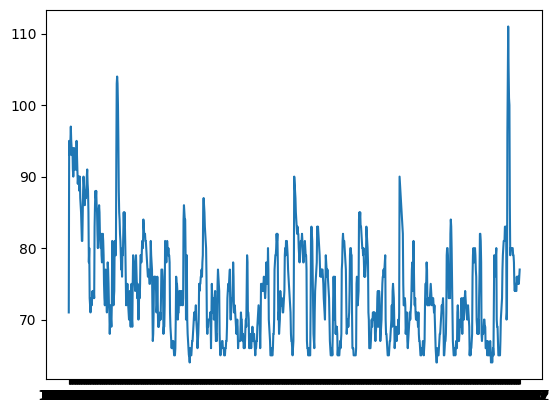

In [100]:
plt.plot(df2.time, df2.value)
plt.show()

In [101]:
# I want to get the hour of the day and time. The end goal of this section is to get a particular time on a particular day. 
hoursDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.hour.apply(lambda x: datetime.timedelta(hours = x))
minutesDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.minute.apply(lambda x: datetime.timedelta(minutes = x))
secondsDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.second.apply(lambda x: datetime.timedelta(seconds = x))
# Getting the date to also have the time of the day
final_df['date'] = final_df['date'] + hoursDelta + minutesDelta + secondsDelta
final_df

,time,value,date
0,12:16:01,88,2022-12-12 12:16:01
1,12:16:06,82,2022-12-12 12:16:06
2,12:16:11,84,2022-12-12 12:16:11
3,12:16:16,88,2022-12-12 12:16:16
4,12:16:21,77,2022-12-12 12:16:21
...,...,...,...
1096,17:43:37,75,2023-02-14 17:43:37
1097,17:43:47,76,2023-02-14 17:43:47
1098,17:43:57,75,2023-02-14 17:43:57
1099,17:44:02,76,2023-02-14 17:44:02


In [102]:
startDate = pd.datetime(year = 2022, month = 11, day = 1)
lastDate = pd.datetime(year = 2023, month = 2, day = 14)
coupledays_df = final_df.loc[final_df.loc[:, 'date'].between(startDate, lastDate), :]

C:\Users\jacob\AppData\Local\Temp\ipykernel_56156\2388420822.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  startDate = pd.datetime(year = 2022, month = 11, day = 1)
C:\Users\jacob\AppData\Local\Temp\ipykernel_56156\2388420822.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  lastDate = pd.datetime(year = 2023, month = 2, day = 14)


In [107]:
oneDayData

{'activities-heart': [{'dateTime': '2023-02-14',
   'value': {'customHeartRateZones': [],
    'heartRateZones': [{'caloriesOut': 1331.99169,
      'max': 112,
      'min': 30,
      'minutes': 1440,
      'name': 'Out of Range'},
     {'caloriesOut': 0,
      'max': 139,
      'min': 112,
      'minutes': 0,
      'name': 'Fat Burn'},
     {'caloriesOut': 0,
      'max': 172,
      'min': 139,
      'minutes': 0,
      'name': 'Cardio'},
     {'caloriesOut': 0,
      'max': 220,
      'min': 172,
      'minutes': 0,
      'name': 'Peak'}]}}],
 'activities-heart-intraday': {'dataset': [{'time': '10:17:42', 'value': 71},
   {'time': '10:17:47', 'value': 95},
   {'time': '10:17:57', 'value': 93},
   {'time': '10:18:02', 'value': 94},
   {'time': '10:18:07', 'value': 95},
   {'time': '10:18:22', 'value': 97},
   {'time': '10:18:27', 'value': 95},
   {'time': '10:18:37', 'value': 94},
   {'time': '10:18:47', 'value': 93},
   {'time': '10:18:52', 'value': 94},
   {'time': '10:19:02', 'value'

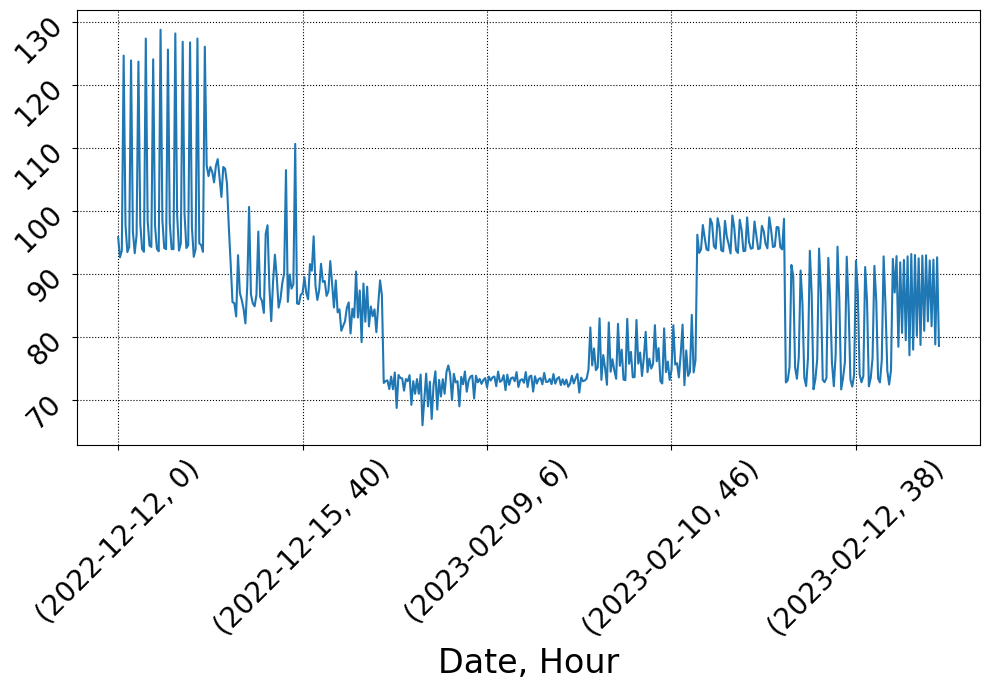

In [103]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 7))
# Taken from: https://stackoverflow.com/questions/16266019/python-pandas-group-datetime-column-into-hour-and-minute-aggregations
times = pd.to_datetime(coupledays_df['date'])
coupledays_df.groupby([times.dt.date,times.dt.second]).value.mean().plot(ax = ax)
ax.grid(True,
    axis = 'both',
    zorder = 0,
    linestyle = ':',
    color = 'k')
ax.tick_params(axis = 'both', rotation = 45, labelsize = 20)
ax.set_xlabel('Date, Hour', fontsize = 24)
fig.tight_layout()

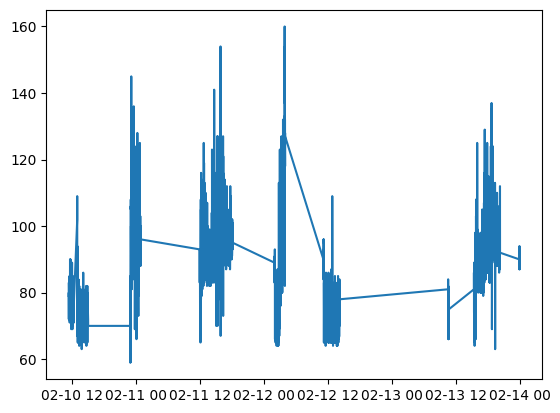

In [124]:
coupledays_df2 = coupledays_df.tail(10000)
plt.plot(coupledays_df2.date, coupledays_df2.value)


In [104]:
coupledays_df.groupby([times.dt.date,times.dt.hour]).value.mean()

date        date
2022-12-12  12      87.077482
            13      91.488235
            14      92.576087
            15      75.627417
            16      78.014085
                      ...    
2023-02-13  17      92.474249
            18      97.900621
            19      96.186373
            20      96.074074
            23      90.093023
Name: value, Length: 63, dtype: float64

In [105]:
# startTime is first date of data that I want. 
# You will need to modify for the date you want your data to start
startTime = pd.datetime(year = 2023, month = 2, day = 1)
endTime = pd.datetime.today().date() - datetime.timedelta(days=1)
date_list = []
resting_list = []
allDates = pd.date_range(start=startTime, end = endTime)
for oneDate in allDates:
    
    oneDate = oneDate.date().strftime("%Y-%m-%d")
    
    oneDayData = auth2_client.intraday_time_series('activities/heart', base_date=oneDate, detail_level='1sec')
    
    date_list.append(oneDate)
    
    resting_list.append(oneDayData['activities-heart'][0]['value']['restingHeartRate'])
# there is more matplotlib code on GitHub
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(date_list, resting_list)

C:\Users\jacob\AppData\Local\Temp\ipykernel_56156\4142396263.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  startTime = pd.datetime(year = 2023, month = 2, day = 1)
C:\Users\jacob\AppData\Local\Temp\ipykernel_56156\4142396263.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  endTime = pd.datetime.today().date() - datetime.timedelta(days=1)


HTTPTooManyRequests: Too Many Requests

In [ ]:
oneDayData['activities-heart'][0]['value']

{'customHeartRateZones': [],
 'heartRateZones': [{'caloriesOut': 1680.912,
   'max': 112,
   'min': 30,
   'minutes': 1440,
   'name': 'Out of Range'},
  {'caloriesOut': 0, 'max': 139, 'min': 112, 'minutes': 0, 'name': 'Fat Burn'},
  {'caloriesOut': 0, 'max': 172, 'min': 139, 'minutes': 0, 'name': 'Cardio'},
  {'caloriesOut': 0, 'max': 220, 'min': 172, 'minutes': 0, 'name': 'Peak'}]}